<a href="https://colab.research.google.com/github/Krithika-Devi/training/blob/main/EDA_on_UK_Universities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [4]:
from google.colab import files
uploaded = files.upload()

Saving uk_universities.csv to uk_universities.csv


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv('uk_universities.csv')
df.head()

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,20.20%,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,16.80%,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,40.40%,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,41.40%,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,22.00%,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                131 non-null    object 
 1   Region                                         131 non-null    object 
 2   Founded_year                                   131 non-null    int64  
 3   Motto                                          114 non-null    object 
 4   UK_rank                                        131 non-null    int64  
 5   World_rank                                     131 non-null    int64  
 6   CWUR_score                                     84 non-null     float64
 7   Minimum_IELTS_score                            131 non-null    float64
 8   UG_average_fees_(in_pounds)                    131 non-null    int64  
 9   PG_average_fees_(in_pounds)                    131 non

In [46]:
df.nunique()

University_name                                  131
Region                                            12
Founded_year                                      70
Motto                                            113
UK_rank                                          119
World_rank                                       130
CWUR_score                                        73
Minimum_IELTS_score                                5
UG_average_fees_(in_pounds)                       83
PG_average_fees_(in_pounds)                       80
International_students                           107
Student_satisfaction                              82
Student_enrollment                                16
Academic_staff                                    18
Control_type                                       2
Academic_Calender                                  5
Campus_setting                                     3
Estimated_cost_of_living_per_year_(in_pounds)     36
Latitude                                      

In [47]:
df['Control_type'].value_counts()

Public     126
Private      5
Name: Control_type, dtype: int64

In [50]:
df['Founded_year'].value_counts()

1992    26
2005     8
1966     7
2007     4
2004     3
1963     3
2012     3
1967     3
1964     3
1962     2
1965     2
1841     2
1973     2
1968     2
2006     2
1892     2
1849     2
1895     2
1904     2
1954     1
1865     1
1733     1
1890     1
1986     1
1884     1
1856     1
1209     1
1850     1
2013     1
2001     1
1993     1
1994     1
2010     1
1862     1
1923     1
1897     1
1975     1
2011     1
1838     1
1858     1
1848     1
1845     1
1916     1
1846     1
1583     1
1413     1
1907     1
1832     1
1826     1
1955     1
1900     1
1909     1
1451     1
1824     1
1952     1
1948     1
1905     1
1990     1
1495     1
1881     1
1829     1
1920     1
1997     1
1961     1
1957     1
1885     1
1096     1
1872     1
1989     1
2008     1
Name: Founded_year, dtype: int64

In [49]:
df['Region'].value_counts()

London                      22
South East England          17
Scotland                    14
South West England          12
North West England          11
Yorkshire and the Humber    11
East of England             10
West Midlands               10
Wales                        9
East Midlands                7
North East England           6
Northern Ireland             2
Name: Region, dtype: int64

In [138]:
df1 =df.loc[(df['Founded_year'] >1950) & (df['UK_rank'] <=20)]

In [85]:
df2 =df.loc[(df['Founded_year'] >1950) & (df['UK_rank'] >20) & (df['UK_rank'] <=40)]

<Figure size 2160x720 with 0 Axes>

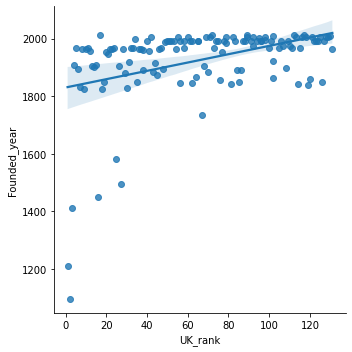

In [61]:
plt.figure(figsize=(30,10))
sns.lmplot(x='UK_rank',y='Founded_year',data=df)

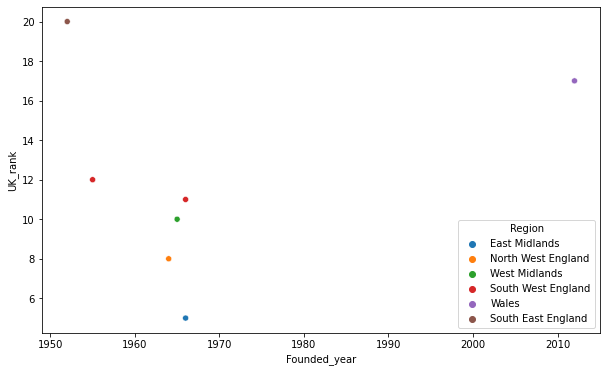

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Founded_year',y='UK_rank',hue='Region')

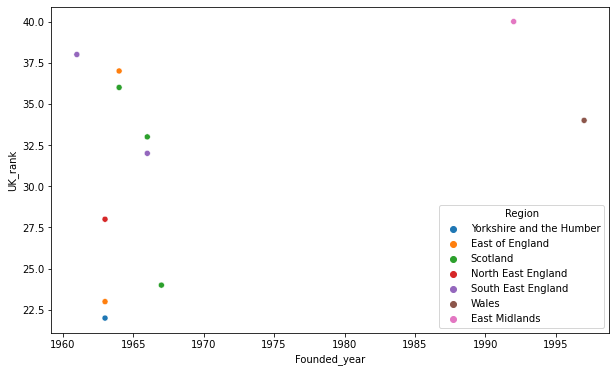

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Founded_year',y='UK_rank',hue='Region')

In [8]:
df.describe()

,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude
count,131.000000,131.000000,131.00000,84.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1925.221374,65.900763,1097.59542,73.960714,4.946565,12537.450382,13099.763359,8644.732824,52.749708,-1.673287
std,139.040187,37.922158,1145.00106,6.351473,0.617850,2555.318861,3106.398149,1579.049538,1.638257,1.503049
min,1096.000000,1.000000,2.00000,65.900000,4.000000,8350.000000,6000.000000,5500.000000,50.171300,-6.675200
25%,1896.000000,33.500000,196.00000,68.675000,4.500000,10758.000000,11250.000000,7710.500000,51.499700,-2.748000
50%,1966.000000,65.000000,691.00000,72.600000,4.500000,12000.000000,12500.000000,8217.000000,52.407400,-1.551600
75%,1992.000000,98.000000,1569.00000,77.700000,5.500000,13825.000000,14182.500000,9457.500000,53.608500,-0.388150
max,2013.000000,131.000000,5253.00000,94.100000,6.500000,23500.000000,29900.000000,15000.000000,57.164800,1.296700


In [9]:
df.isnull().any(axis='columns')

0      False
1      False
2      False
3      False
4      False
       ...  
126     True
127     True
128     True
129     True
130     True
Length: 131, dtype: bool

In [10]:
pd.set_option('display.max_rows',None)

In [11]:
dfnull = df[df.isnull().any(axis=1)]

In [12]:
dfnull

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
16,Harper Adams University,Wales,2012,Useful and agreeable,17,2840,NaN,4.5,8500,10000,5.10%,82.40%,"5,000-5,999",100-199,Public,Other,Rural,6000,52.7790,-2.4277,www.harper-adams.ac.uk
25,University of Sheffield,Yorkshire and the Humber,1905,To know the causes of things,26,97,79.9,5.5,14500,14500,21.50%,82.10%,"30,000-34,999","3,000-3,499",Public,NaN,Urban,7200,53.3814,-1.4884,www.sheffield.ac.uk
32,Heriot-Watt University,Scotland,1966,Leaders in ideas and solutions,33,314,72.2,5.5,13020,13420,20.30%,77.90%,"10,000-14,999",800-899,Public,NaN,Suburban,8000,55.9112,-3.3217,www.hw.ac.uk
37,University of Sussex,South East England,1961,Be still and know,38,140,77.7,5.5,14450,14450,27.20%,76.40%,"15,000-19,999","2,000-2,499",Public,NaN,NaN,12500,50.8677,-0.0875,www.sussex.ac.uk
38,University of Reading,South East England,1892,NaN,38,164,77.7,5.5,14350,14165,18.90%,75.20%,"15,000-19,999","1,500-1,999",Public,Other,NaN,8500,51.4414,-0.9418,www.reading.ac.uk
39,Nottingham Trent University,East Midlands,1992,NaN,40,607,69.6,4.5,12163,12117,6.60%,81.70%,"30,000-34,999","2,000-2,499",Public,Quarters,Urban,9398,52.9581,-1.1542,www.ntu.ac.uk
41,University for the Creative Arts,South East England,2005,NaN,42,2030,NaN,4.5,11870,12150,11.70%,78.00%,"6,000-6,999",300-399,Public,NaN,NaN,8990,51.2151,-0.8054,www.ucreative.co.uk
42,Arts University Bournemouth,South West England,1885,A place to shape and build your work; to learn...,43,3420,NaN,4.5,12500,12500,13.60%,82.90%,"3,000-3,999",300-399,Public,NaN,NaN,6000,50.7417,-1.8977,aub.ac.uk
43,"SOAS, University of London",London,1916,Knowledge is Power,44,672,68.5,5.5,16880,16880,38.60%,71.20%,"5,000-5,999",700-799,Public,NaN,Urban,10229,51.5224,-0.1293,www.soas.ac.uk/
51,University of West London,London,1990,NaN,52,2319,NaN,4.5,10650,10995,17.20%,84.70%,"10,000-14,999","1,000-1,499",Public,Semesters,NaN,10000,51.5069,-0.3032,www.uwl.ac.uk


Text(0.5, 1.0, 'Distribution of Campus Setting')

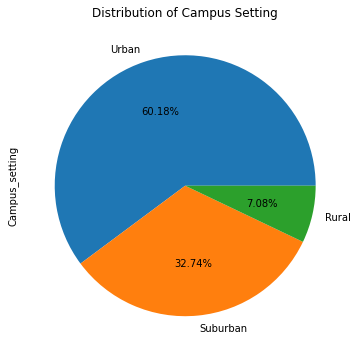

In [58]:
df['Campus_setting'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Campus Setting")

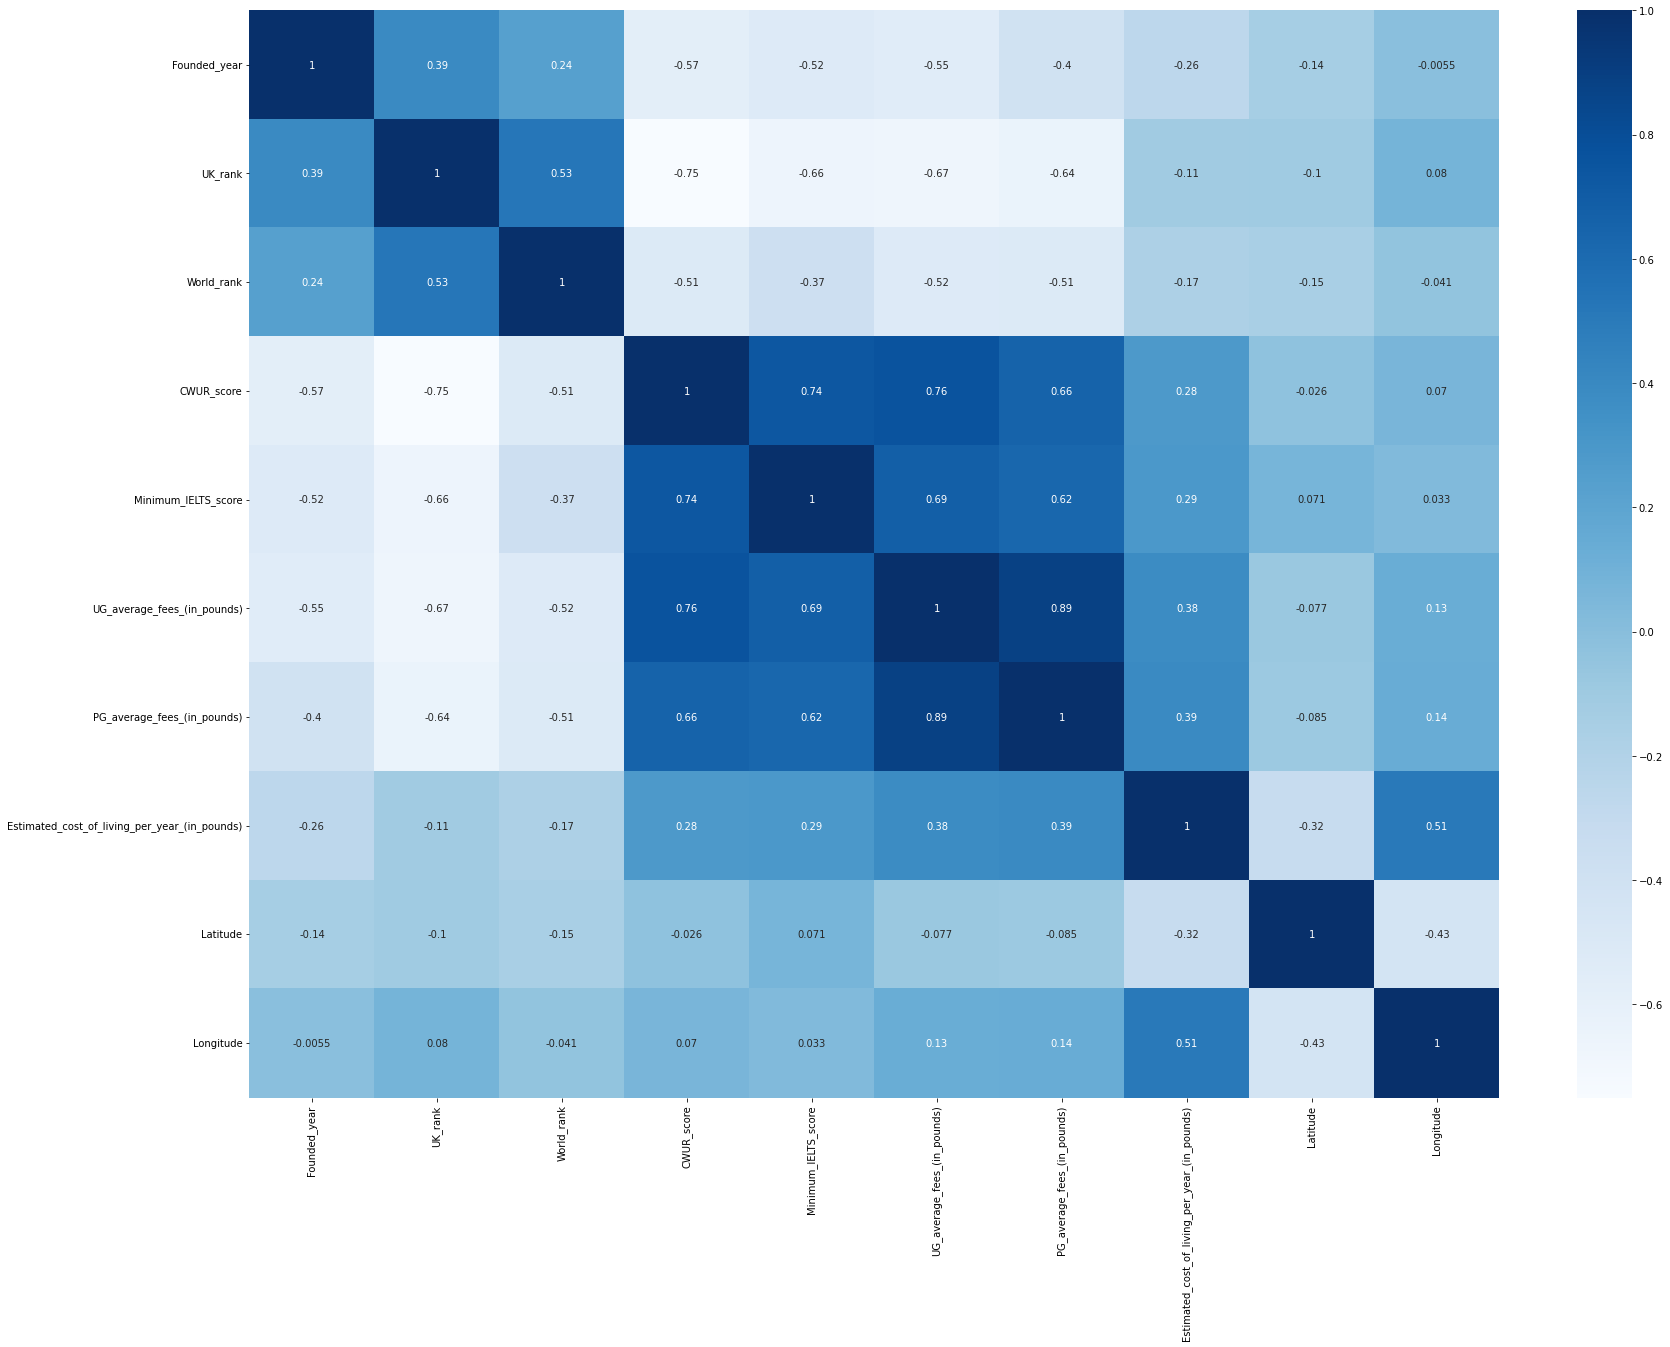

In [59]:
fig=plt.figure(figsize=(28,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()
fig.savefig('ukunivheatmap.png')

In [91]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

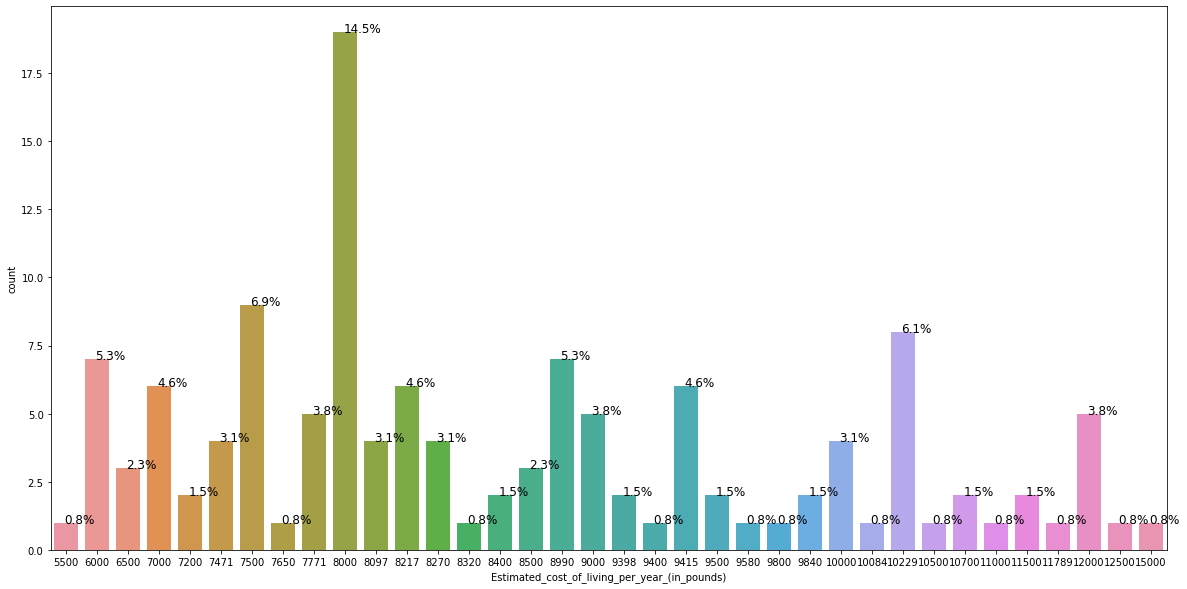

In [115]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Estimated_cost_of_living_per_year_(in_pounds)', data=df)
without_hue(ax, df['Estimated_cost_of_living_per_year_(in_pounds)'])

Text(0.5, 1.0, 'Distribution of Region')

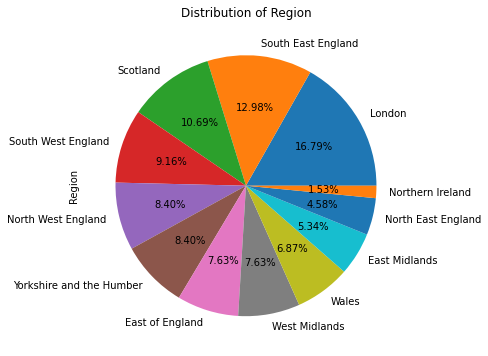

In [98]:
df['Region'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Region")

<Figure size 1440x720 with 0 Axes>

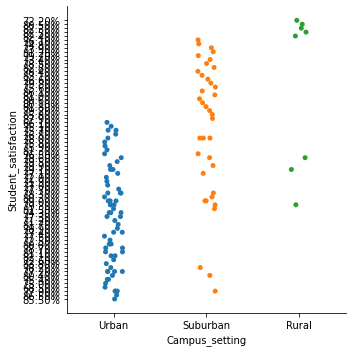

In [131]:
plt.figure(figsize=(20,10))
ax = sns.catplot(x='Campus_setting',y='Student_satisfaction',data=df)

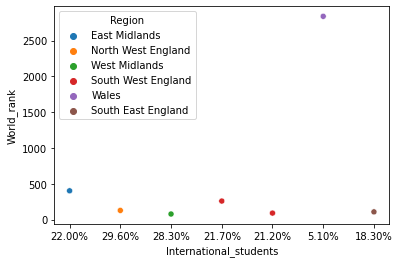

In [139]:
sns.scatterplot(x='International_students',y='World_rank',hue='Region',data=df1)

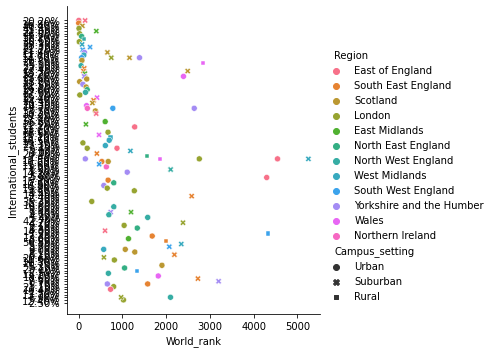

In [143]:
sns.relplot(x="World_rank",y="International_students",hue='Region',style = 'Campus_setting',data=df)